# CVX_CHW3
# Mohammad amin rami 

# Q1: optimal evacuation:

                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) Jul 03 12:05:10 AM: Your problem has 501 variables, 5 constraints, and 0 parameters.
(CVXPY) Jul 03 12:05:10 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 03 12:05:10 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 03 12:05:10 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jul 03 12:05:10 AM: Compiling problem (target solver=ECOS).
(CVXPY) Jul 03 12:05:10 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -

Text(0, 0.5, 'f_t')

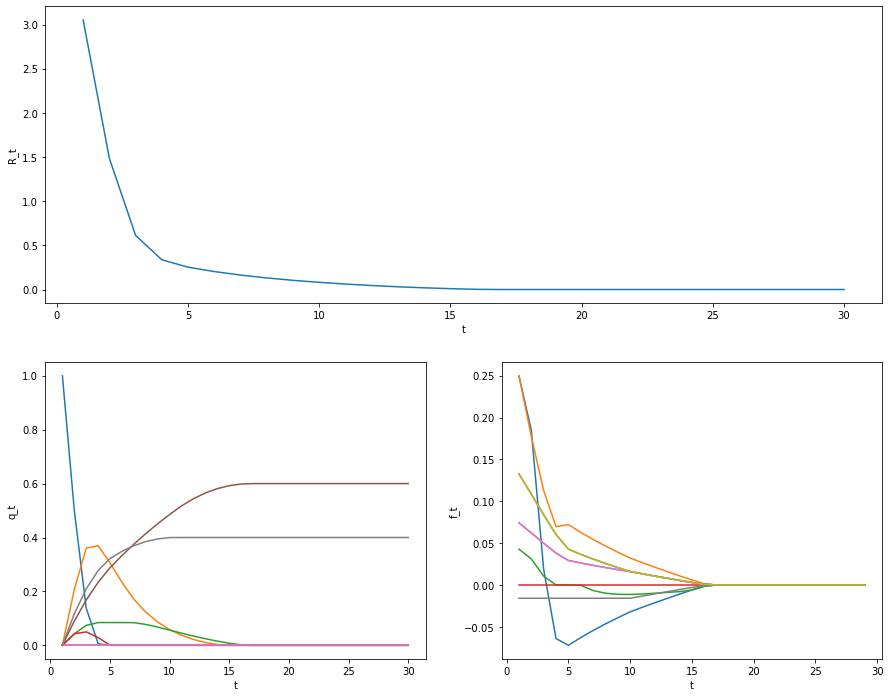

In [16]:
# Run this section first.

import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt

from opt_evac_data import *

# Defining the variables, objective function and constraints:

n = A.shape[0]
m = A.shape[1]
f = cvx.Variable((m, T-1))
q = cvx.Variable((n, T))

node_risk = q.T @ r + cvx.square(q).T @ s
edge_risk = cvx.hstack([cvx.abs(f).T @ rtild + cvx.square(f).T @ stild, 0])
risk = node_risk + edge_risk

constraints = [q[:, 0] == q1,
 q[:, 1:] == A @ f + q[:, :-1],
 0 <= q, q <= np.tile(Q, (T, 1)).T,
 cvx.abs(f) <= np.tile(F, (T-1, 1)).T]

# Solving the convex problem:

p = cvx.Problem(cvx.Minimize(cvx.sum(risk)), constraints)
p.solve(verbose=True, solver=cvx.ECOS)

arr = lambda _: np.array(_.value)
q, f, risk, node_risk = map(arr, (q, f, risk, node_risk))

print()
print("Duration of Evacuation =", (node_risk <= 1e-4).nonzero()[0][0] + 1)
print()
print("Total risk:", p.value)

# # Plotting the results

figure = plt.figure(figsize = (15,12))

ax1 = figure.add_subplot(2, 2, (1,2))
ax1.plot(np.arange(1,T+1), risk)
ax1.set_xlabel('t')
ax1.set_ylabel('R_t')

ax2 = figure.add_subplot(2, 2, 3)
ax2.plot(np.arange(1,T+1), q.T)
ax2.set_xlabel('t')
ax2.set_ylabel('q_t')

ax3 = figure.add_subplot(2, 2,4)
ax3.plot(np.arange(1,T), f.T)
ax3.set_xlabel('t')
ax3.set_ylabel('f_t')


# Q2: ciruit design:


In [2]:

from blend_design_data import *

# define variables 

theta = cvx.Variable(k)

# Constraints

constraints =  [np.log(P) * theta <= np.log(P_spec)]
constraints += [np.log(D) * theta <= np.log(D_spec)]
constraints += [np.log(A) * theta <= np.log(A_spec)]
constraints += [cvx.sum(theta) == 1, theta >= 0]

# Objective function

objective = cvx.Minimize(0)

# Solving convex problem
cvx.Problem(objective, constraints).solve()

w = np.exp(np.log(W) @ theta.value)
print('tetha = ',theta.value)
print()
print('w = ',w)


tetha =  [0.01758686 0.49673786 0.00452331 0.47531367 0.00408995 0.00174836]

w =  [2.63859837 3.28069166 2.96934036 3.26617754 2.32426888 3.66532996
 2.92976112 3.68571815 3.8940303  3.3972013 ]


C:\Users\Mahyar\anaconda3\lib\site-packages\cvxpy\expressions\expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)
C:\Users\Mahyar\anaconda3\lib\site-packages\cvxpy\expressions\expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 2 times so far.

  warnings.warn(msg, UserWarning)
C:\Users\Mahyar\an

# Q3: covariance matrix:

In [17]:
n_1 = 1
n_2 = 1
n_3 = 1
n = n_1 + n_2 + n_3

S = np.ones((n_1 + n_2, n_1 + n_2))
T = np.ones((n_2 + n_3, n_2 + n_3))

R = cvx.Variable((n, n), PSD=True)
R1 = R[0:2, 0:2]
R2 = R[1:3, 1:3]
R_13 = R[0, 2]

# Objective function

objective_func = cvx.Minimize(cvx.norm(R1 - S, "fro") ** 2 + cvx.norm(R2 - T, "fro") ** 2 + cvx.norm(R_13, "fro") ** 2)

# Solving convex problem

p = cvx.Problem(objective_func, [])
p.solve()

R_simple = np.array([[1, 1, 0], [1, 1, 1], [0, 1, 1]])
print("Optimal Value: ", p.value)
print()
print("R matrix is: \n", str(R.value))


Optimal Value:  0.1748449531164722

R matrix is: 
 [[1.09855076 0.84973176 0.19710124]
 [0.84973176 1.11456302 0.84973176]
 [0.19710124 0.84973176 1.09855076]]


# Q4:  Control and optimization


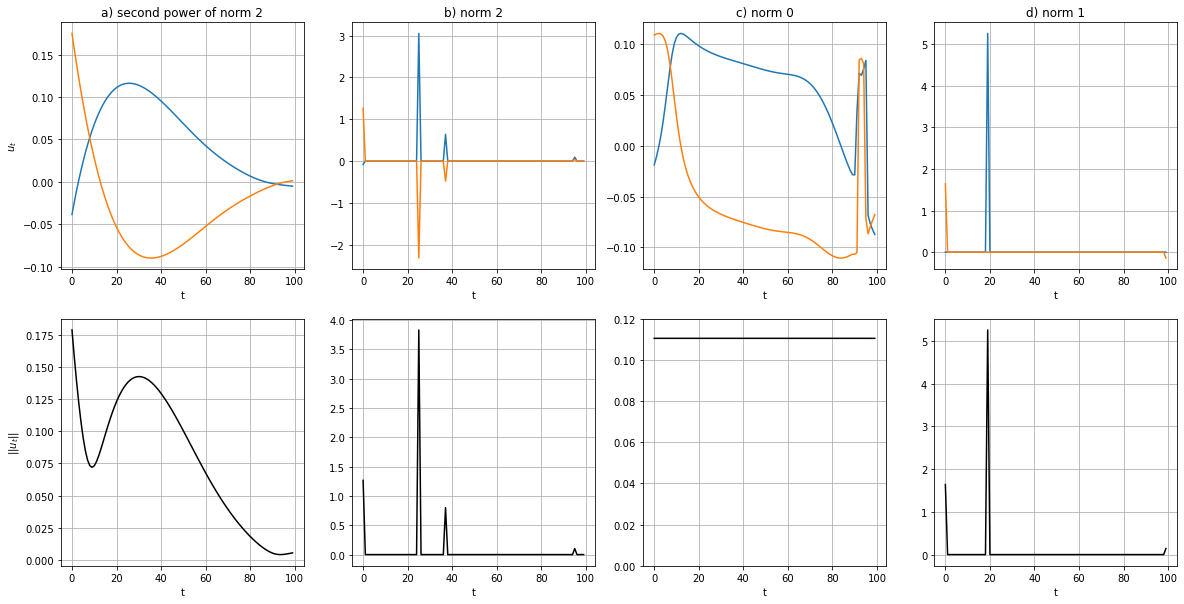

In [5]:
import matplotlib.gridspec as gridspec

from various_obj_regulator_data import *

# Variables
u_ = cvx.Variable((m,T))
x_ = cvx.Variable((n,T+1))

# Objective functions(different norms)

objs = [(cvx.Minimize(cvx.sum_squares(u_)) , "a) second power of norm 2"),
        (cvx.Minimize(cvx.sum(cvx.norm(u_,2,axis=0))) , "b) norm 2"),
        (cvx.Minimize(cvx.max(cvx.norm(u_,axis=0))) , "c) norm 0"),
        (cvx.Minimize(cvx.sum(cvx.norm(u_,1,axis=0))) , "d) norm 1")]

# plot

plt.figure(figsize=(20,10))
for i,obj in enumerate(objs):
    const = [x_[:,-1] == np.zeros(n)]
    const.append(x_[:,0] == x_init)
    for t in range(1,T+1):
        const.append(x_[:,t] == A@x_[:,t-1] + B@u_[:,t-1])
    prob = cvx.Problem(obj[0],const)
    prob.solve()
    plt.subplot(2,4,i+1)
    plt.plot(u_.value.T)
    if i == 0:
        plt.ylabel("$u_t$")
    plt.title(obj[1])
    plt.grid()
    plt.xlabel("t")
    plt.subplot(2,4,i+5)
    plt.xlabel("t")
    plt.plot(np.linalg.norm(u_.value,axis=0),c="black",label="$||u||_2$")
    if i == 2:
        plt.ylim(ymax = .12,ymin=0)
    if i == 0:
        plt.ylabel("$||u_t||$")
    plt.grid()

# Q5: Portfolio optimization:



In [12]:

from multi_risk_portfolio_data import *

# defining variables

w = cvx.Variable(n)
t = cvx.Variable()

# objective function 

risks = [cvx.quad_form(w, Sigma) for Sigma in (Sigma_1, Sigma_2, Sigma_3, Sigma_4, Sigma_5, Sigma_6)]

#constraints:

risk_constraints = [risk <= t for risk in risks]

#Solving the problem 

prob = cvx.Problem(cvx.Maximize(w.T @ mu - gamma * t), risk_constraints + [cvx.sum(w) == 1])

# Solving the problem:

print("worst case: ")
prob.solve()


worst case: 


0.12188077796855634

In [13]:
print("risk values:")
print("\n".join(["{}".format(risk.value) for risk in risks]))


risk values:
0.12188147869216358
0.0845435093279839
0.08247154816056775
0.12188147866045741
0.12188147865154536
0.12188147858512846


In [14]:
print("weights:")
print(w.value)
print()

weights:
[ 0.42473821  0.66426997 -0.11469037  1.38055509  1.42422852 -1.5270649
 -0.61401545 -0.49879081 -0.25406876  0.11483851]



In [15]:
print("g_k values:")
print("\n".join(["{}".format(risk.dual_value) for risk in risk_constraints]))


g_k values:
[0.29231555]
[3.35614466e-10]
[3.53625899e-10]
[0.46580236]
[0.14230459]
[0.0995775]
